In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer

from utils import stop_words, make_corpus_df, get_data_by_year, make_total_word_count_df

In [2]:
data_dir = './TelevisionNewsV2'
corpus_df = make_corpus_df(data_dir)

data_2009, data_2019, data_2020 = get_data_by_year(corpus_df, 2009), get_data_by_year(corpus_df, 2019), get_data_by_year(corpus_df, 2020)
data_19_20 = pd.concat([data_2019, data_2020])

In [3]:
total_word_count_df_2009 = make_total_word_count_df(data_2009, stop_words, '2009')
total_word_count_df_19_20 = make_total_word_count_df(data_19_20, stop_words, '19_20')

In [31]:
all_words = pd.concat([total_word_count_df_2009['word'], total_word_count_df_19_20['word']], axis=0, ignore_index=True)
all_words = all_words.unique()

In [36]:
joint_2009_19_20_df = pd.DataFrame(data={'word': all_words})
joint_2009_19_20_df = joint_2009_19_20_df.merge(total_word_count_df_19_20, how='left', on='word')
joint_2009_19_20_df = joint_2009_19_20_df.merge(total_word_count_df_2009, how='left', on='word')
joint_2009_19_20_df.fillna(0, inplace=True)

joint_2009_19_20_df['rel_frequency_diff'] = joint_2009_19_20_df['rel_frequency_19_20'] - joint_2009_19_20_df['rel_frequency_2009']
joint_2009_19_20_df.sort_values('rel_frequency_diff', ascending=False, inplace=True)

In [38]:
top_30_entries = joint_2009_19_20_df.head(30)

In [65]:
top_30_entries

,word,total_count_19_20,rel_frequency_19_20,total_count_2009,rel_frequency_2009,rel_frequency_diff
18316,trump,1520.0,0.005169,0.0,0.000000,0.005169
2175,crisis,1623.0,0.005519,78.0,0.000593,0.004926
4934,issue,2289.0,0.007784,478.0,0.003632,0.004152
1278,candidate,859.0,0.002921,16.0,0.000122,0.002799
2450,democrat,1105.0,0.003757,155.0,0.001178,0.002580
4014,going,2725.0,0.009266,888.0,0.006747,0.002519
6189,new,1715.0,0.005832,459.0,0.003487,0.002344
3286,everywhere,664.0,0.002258,5.0,0.000038,0.002220
6767,people,2262.0,0.007692,734.0,0.005577,0.002115
9506,touched,636.0,0.002163,9.0,0.000068,0.002094


In [40]:
top_30_words = top_30_entries['word']
top_30_rel_freq_diffs = top_30_entries['rel_frequency_diff']

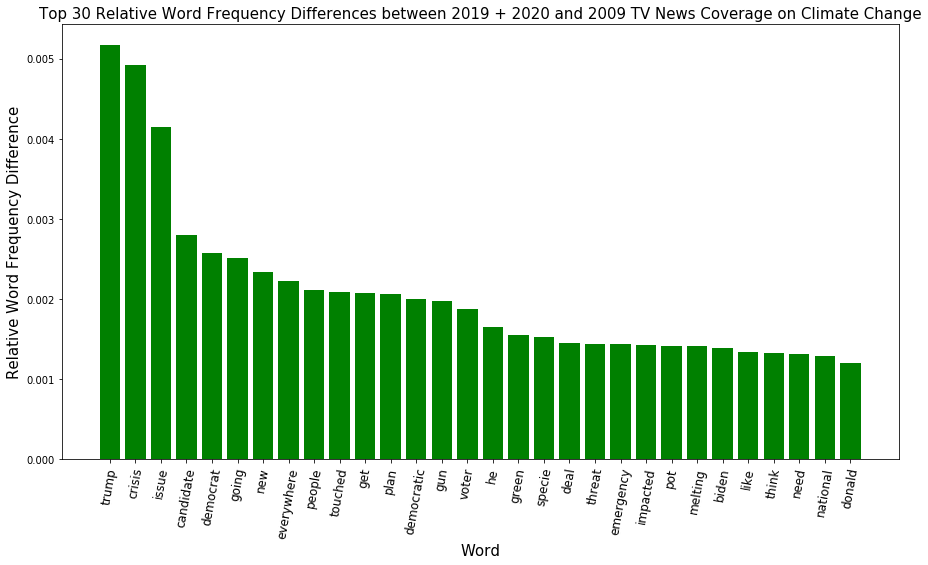

In [78]:
x = np.arange(len(top_30_words))
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(x, top_30_rel_freq_diffs, color='green')
ax.set_title('Top 30 Relative Word Frequency Differences between 2019 + 2020 and 2009 TV News Coverage on Climate Change', fontsize=15)
ax.set_ylabel('Relative Word Frequency Difference', fontsize=15)
ax.set_xlabel('Word', fontsize=15)
ax.set_xticks(x)
plt.xticks(rotation=80)
ax.set_xticklabels(top_30_words, fontsize=12)
fig.savefig('./plots/rel_freq_diff_19_20_2009.png')
plt.show()

From the plot of the top 30 relative word frequency differences between 2019 + 2020 and 2009, we notice that the president during 2019 + 2020, Donald Trump, is mentioned the most. Along with Donald Trump, other words and phrases related politics are mentioned more so in 2019 + 2020 than in 2009 including candidate, democrat (democratic), voter, biden, and the green new deal. These words likely show up more in the TV News of 2019 + 2020 since Joe Biden was a leading democratic candidate for the 2020 presidential election and democratic policies in regards to climate change are typically green (including the Green New Deal). Lastly, we observe words indicative of ubiquitous crisis being used to describe climate change more so in 2019 + 2020 than in 2009 including crisis, issue, everywhere, people, emergency, threat, impacted, need, and national.